In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

NUM_EPOCHS = 1500 # Number of training epochs

In [2]:
def readData(filePath) :
    x_data = []
    y_data = []
    allList = []
    newPointx=[]
    newPointy=[]
    
    with open(filePath, 'r') as f:
        for line in f:
            allList.append(float(line))

    df = pd.Series(allList) #일차원 리스트를 pandas 데이터프레임화

    while True:
        for i in df[0:7]: 
            newPointx.append(float(i)) #데이터프레임 앞의 7개를 newPointx 리스트에 삽입
        newPointy.append(float(df[7])) #데이터프레임 그 다음(8번째)을 newPointy 리스트에 삽입

        x_data.append(newPointx) #x_data 리스트에 newPointx 리스트를 삽입 (x_data는 array of array가 됨)
        y_data.append(newPointy) #위와 동일

        newPointx=[] #다음 반복을 위해 newPointx,y를 빈 리스트로 초기화
        newPointy=[]
        df=df.shift(-1) #데이터프레임 왼 쪽으로 1칸 쉬프트
        if(math.isnan(df[7])): #만약 8번째 데이터프레임이 NaN(Not a Number) 라면 반복 중지
            break

    #배열 갯수 보정작업
    #데이터의 개수가 항상 8의 배수가 아니기 때문에 x_data의 마지막 원소 리스트가 항상 7개가 아닐수 있고
    #y_data의 마지막 원소 리스트가 항상 1개가 아닐 수 있기 때문에 
    #빈 칸들은 0으로 채워주기 위한 작업
    if(len(x_data[-1]) != 7):
       xSize = 7-len(x_data[-1])
       for i in range(xSize):
           x_data[-1].append(0.0)
    if(len(y_data[-1])!=1):
       y_data[-1].append(0.0)  
    
    data = [x_data, y_data]
    return data;

In [3]:
x = tf.placeholder(tf.float32, [None, 7], name='x') # Input placeholder
y_desired = tf.placeholder(tf.float32, [None, 1], name='y_desired') # Desired output placeholder

In [4]:
trainData_in, trainData_out = readData('85655_train.csv')
testData_in, testData_out = readData('85655_test.csv')

In [5]:
# Weights from inputs to first hidden layer (15 nodes):
Wh1 = tf.Variable(tf.random_uniform([7, 15], minval = -1, maxval = 1, dtype = tf.float32))
# Bias for first hidden layer:
bh1 = tf.Variable(tf.zeros([1, 15]))

# Weights from first hidden layer to second (15 nodes):
Wh2 = tf.Variable(tf.random_uniform([15, 15], minval = -1, maxval = 1, dtype = tf.float32))
# Bias for second hidden layer:
bh2 = tf.Variable(tf.zeros([1, 15])) # One bias input for each of the 10 output nodes

# Weights from second hidden layer to output layer (1 node):
Wo = tf.Variable(tf.random_uniform([15, 1], minval = -1, maxval = 1, dtype = tf.float32))
# Bias to output node:
bo = tf.Variable(tf.zeros([1, 1]))

# Nodes have no output function (they simply output their activation):
h1 = tf.add(tf.matmul(x, Wh1), bh1) # Hidden layer 1 output
h2 = tf.add(tf.matmul(h1, Wh2), bh2) # Hidden layer 2 output
prediction = tf.add(tf.matmul(h2, Wo), bo) # Network output

In [6]:
# Error function to be minimized is the mean square error:
loss = tf.reduce_mean(tf.square(prediction - y_desired))

In [7]:
# Define training algorithm (Adam Optimizer):
# Note: AdamOptimizer produced better results than the GradientDescentOptimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

In [8]:
errors = []
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()
for i in range(NUM_EPOCHS): # 1500 training epochs
    sess.run(train_step, feed_dict={x: trainData_in, y_desired: trainData_out})



Instructions for updating:
Use `tf.global_variables_initializer` instead.


i: 0, inputPoint: [99.0, 99.0, 99.0, 99.0, 99.0, 98.0, 98.0], predicted: 98.1111, desired: 98.0
i: 1, inputPoint: [99.0, 99.0, 99.0, 99.0, 98.0, 98.0, 98.0], predicted: 98.01, desired: 98.0
i: 2, inputPoint: [99.0, 99.0, 99.0, 98.0, 98.0, 98.0, 98.0], predicted: 98.2919, desired: 98.0
i: 3, inputPoint: [99.0, 99.0, 98.0, 98.0, 98.0, 98.0, 98.0], predicted: 98.0058, desired: 98.0
i: 4, inputPoint: [99.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0], predicted: 98.2648, desired: 98.0
i: 5, inputPoint: [98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0], predicted: 98.1623, desired: 98.0
i: 6, inputPoint: [98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0], predicted: 98.1623, desired: 97.0
i: 7, inputPoint: [98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 97.0], predicted: 96.8439, desired: 97.0
i: 8, inputPoint: [98.0, 98.0, 98.0, 98.0, 98.0, 97.0, 97.0], predicted: 97.1192, desired: 97.0
i: 9, inputPoint: [98.0, 98.0, 98.0, 98.0, 97.0, 97.0, 97.0], predicted: 97.0181, desired: 96.0
i: 10, inputPoint: [98.0, 98.0, 98.0, 97.0

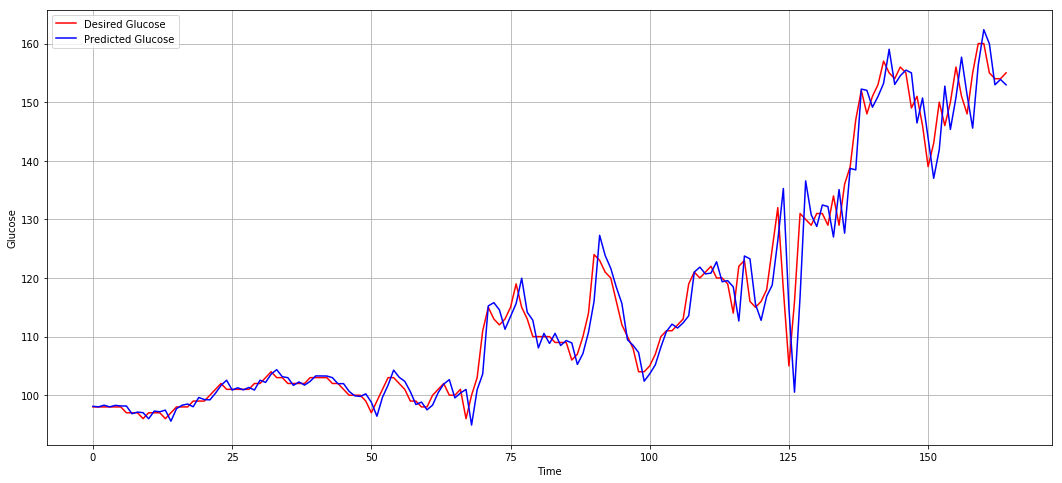

In [9]:
# Compute mse:
mse = sess.run(tf.reduce_mean(tf.square(prediction - y_desired)), feed_dict={x: testData_in, y_desired: testData_out})
predictedList=[]
desiredList=[]
for i, inputPoint in enumerate(testData_in) :
    # Apply network on current point:
    predicted = sess.run(prediction, feed_dict={x: [inputPoint]})
    predictedList.append(predicted[0][0])
    desired = testData_out[i][0]
    desiredList.append(desired)
    print("i: "+str(i)+", inputPoint: "+str(inputPoint)+", predicted: "+str(predicted[0][0])+", desired: "+str(desired))
    
# Print results:
print('MSE: ', mse)
print('')
plt.figure(figsize=(18, 8))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Glucose")
plt.plot(desiredList, "r-", label="Desired Glucose");
plt.plot(predictedList, "b-", label="Predicted Glucose")
plt.legend()
plt.show()